In [1]:
class Door:
    def __init__(self, locked = False):
        self.locked = locked
        self.is_open = False

    def open(self):
        if self.is_open:
            return True
        elif self.locked:
            return False
        else:
            self.is_open = True
            return True

In [2]:
my_door = Door()
my_door.is_open

False

In [3]:
my_door.open()

True

In [4]:
my_door.is_open

True

In [5]:
my_door = Door(True)
my_door.is_open

False

In [6]:
my_door.open()

False

In [7]:
my_door.is_open

False

In [8]:
import numpy as np

In [9]:
a1 = np.uint8(255) + 1

In [10]:
a1

256

In [11]:
a1 = np.ones(1, dtype='uint8') * 255 + 1

In [12]:
a1, a1.dtype

(array([0], dtype=uint8), dtype('uint8'))

In [13]:
a2 = np.ones((512, 512, 512), dtype="uint8")

In [14]:
a2.sum()

134217728

In [15]:
vals = np.random.random(10)

In [16]:
np.clip(vals, 0.2, 0.5)

array([ 0.5       ,  0.2       ,  0.5       ,  0.2       ,  0.2       ,
        0.23452905,  0.2       ,  0.5       ,  0.5       ,  0.45709314])

In [17]:
a1 = np.ones(100, dtype='uint8') * 255

In [18]:
np.clip(a1.astype("uint16") + 10, 0, 255).astype("uint8")

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255], dtype=uint8)

In [19]:
np.ones(10, dtype='uint8').astype("u2")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint16)

In [20]:
a1 = np.ones(10, dtype="uint16") * 257

In [21]:
a1.astype("uint8")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [22]:
from PIL import Image

In [23]:
import matplotlib.pyplot as plt

In [24]:
im_array = np.array(Image.open("/home/storage/downloads/wherespoochie.jpg"))

In [25]:
fp_im = im_array.astype("float64") / 255

In [35]:
def make_plot(arr):
    plt.subplot(2, 1, 1)
    plt.hist(arr[:,:,0].ravel(), density=True, color='r', bins=256, alpha=0.33)
    plt.hist(arr[:,:,1].ravel(), density=True, color='g', bins=256, alpha=0.33)
    plt.hist(arr[:,:,2].ravel(), density=True, color='b', bins=256, alpha=0.33)
    #plt.ylim(0, 1)
    plt.subplot(2, 1, 2)
    plt.imshow(arr)

In [36]:
def shift_channel(arr, channel, value):
    output = arr.copy()
    output[:,:,channel] += value
    output = np.clip(output, 0.0, 1.0)
    return output

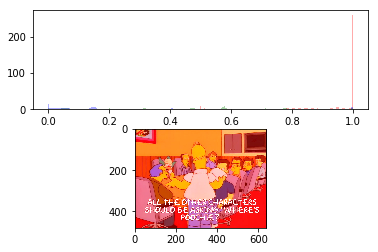

In [37]:
make_plot( shift_channel(fp_im, 0, 0.5) )

In [38]:
import ipywidgets

In [39]:
@ipywidgets.interact(red_shift = (-1.0, 1.0, 0.01),
                     green_shift = (-1.0, 1.0, 0.01),
                     blue_shift = (-1.0, 1.0, 0.01))
def shift_and_plot(red_shift, green_shift, blue_shift):
    arr = shift_channel(fp_im, 0, red_shift)
    arr = shift_channel(arr, 1, green_shift)
    arr = shift_channel(arr, 2, blue_shift)
    make_plot(arr)

interactive(children=(FloatSlider(value=0.0, description='red_shift', max=1.0, min=-1.0, step=0.01), FloatSlider(value=0.0, description='green_shift', max=1.0, min=-1.0, step=0.01), FloatSlider(value=0.0, description='blue_shift', max=1.0, min=-1.0, step=0.01), Output()), _dom_classes=('widget-interact',))

In [40]:
import scipy.ndimage as ndimage

In [41]:
np.array( [[0, 0, 0 ], [0, 1, 0], [0, 0, 0]] )

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [48]:
avg = np.ones((4,4))
avg = avg / avg.sum()

In [49]:
avg

array([[ 0.0625,  0.0625,  0.0625,  0.0625],
       [ 0.0625,  0.0625,  0.0625,  0.0625],
       [ 0.0625,  0.0625,  0.0625,  0.0625],
       [ 0.0625,  0.0625,  0.0625,  0.0625]])

In [50]:
conv = ndimage.convolve(fp_im[:,:,0], avg, mode='constant', cval = 0)

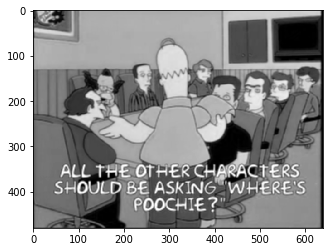

In [51]:
plt.imshow(conv, cmap='gray')

In [53]:
@ipywidgets.interact(size = (1, 16, 1))
def make_average(size):
    avg = np.ones((size,size))
    avg = avg / avg.sum()
    conv = ndimage.convolve(fp_im[:,:,0], avg, mode='constant', cval = 0)
    plt.imshow(conv, cmap="gray")

interactive(children=(IntSlider(value=8, description='size', max=16, min=1), Output()), _dom_classes=('widget-interact',))

array([[ 0.0625,  0.0625,  0.0625,  0.0625],
       [ 0.0625,  0.0625,  0.0625,  0.0625],
       [ 0.0625,  0.0625,  0.0625,  0.0625],
       [ 0.0625,  0.0625,  0.0625,  0.0625]])

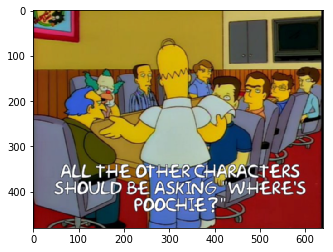

In [60]:
avg = np.ones((3,3,3))
avg[:,:,0] = 0
avg[:,:,2] = 0
avg = avg / avg.sum()
conv = ndimage.convolve(fp_im, avg, mode='constant', cval = 0)
plt.imshow(conv)

In [112]:
class MyImage:
    def __init__(self, arr):
        self.data = arr.copy()
        
    @property
    def shape(self):
        return self.data.shape
    
    @property
    def hist(self):
        return np.histogram(self.data[:,:,0], bins=256)
    
    @classmethod
    def fromfile(cls, fn):
        arr = np.array(Image.open(fn))
        new_instance = cls(arr)
        return new_instance
    
    @classmethod
    def frommyimage(cls, im):
        return cls(im.data)
    
    def __add__(self, value):
        output = self.data.copy()
        output[:,:,:] += value
        output = np.clip(output, 0, 255)
        return MyImage(output)
    
def image_from_filename(fn):
    arr = np.array(Image.open(fn))
    new_instance = MyImage(arr)
    return new_instance

In [113]:
im = MyImage.fromfile("/home/storage/downloads/wherespoochie.jpg")

In [114]:
MyImage.frommyimage(im)

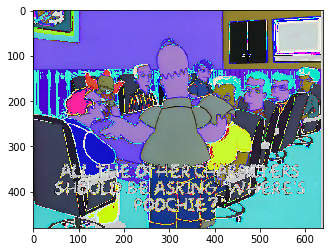

In [116]:
plt.imshow(im.data + 200)